In [2]:
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.applications.resnet50 import decode_predictions
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import plot_model
import PIL, cv2
import numpy as np

In [3]:
resnet50 = ResNet50()

2026-01-21 12:33:27.109051: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


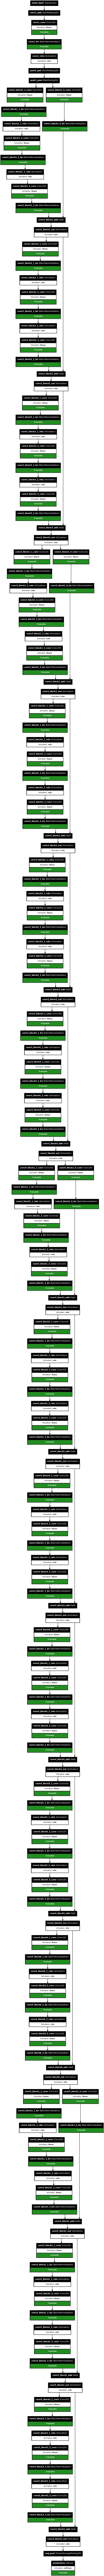

In [4]:
plot_model(resnet50, show_layer_names=True, 
           show_layer_activations=True, show_trainable=True)

In [5]:
# Import only feature extractiob layers
resnet50 = ResNet50(include_top=False)

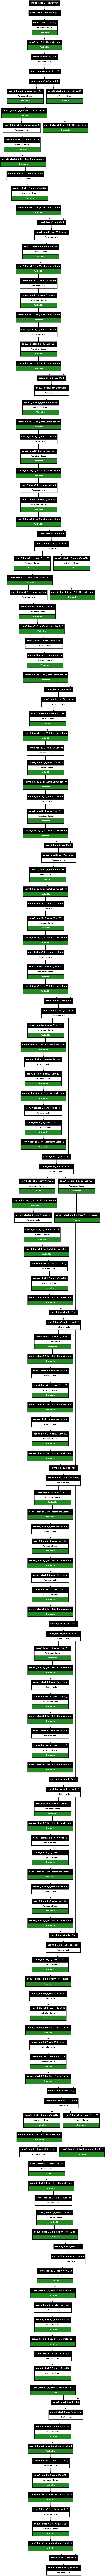

In [6]:
plot_model(resnet50, show_layer_names=True, 
           show_layer_activations=True, show_trainable=True)

In [7]:
resnet50.trainable = False

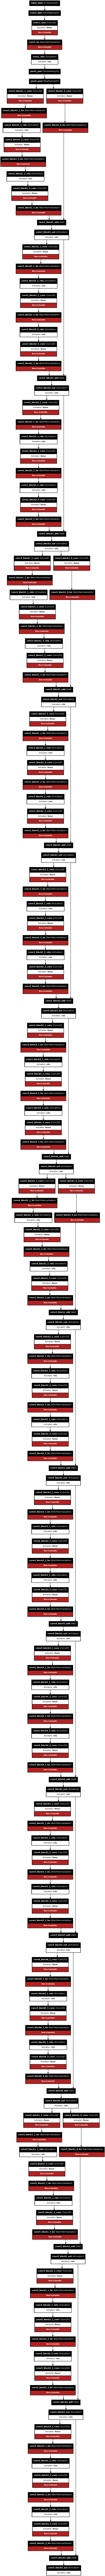

In [8]:
plot_model(resnet50, show_layer_names=True, 
           show_layer_activations=True, show_trainable=True)

In [9]:
resnet50 = ResNet50(include_top=False, input_shape=(32,32,3))
resnet50.trainable = False

#### Build the model

In [10]:
from keras.models import Model 
from keras.layers import Dense, Flatten

In [11]:
# Flatten the output of ResNet
x = resnet50.output
x = Flatten()(x)

# Add fully connected layer 
fc1 = Dense(256, activation='relu', name='fc1')(x)

# Add the output layer
output = Dense(10, activation='softmax')(fc1)

In [12]:
# Create the final model 
model = Model(inputs=resnet50.input, outputs=output)

In [13]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 38, 38, 3) │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 16, 16,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 16, 16,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 16, 16,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 18, 18,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 8, 8, 64)  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 8, 8, 64)  │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_1_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 8, 8, 64)  │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_2_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 8, 8, 256) │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 8, 8, 256) │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_3_c

 Total params: 24,114,826 (91.99 MB)

 Trainable params: 527,114 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

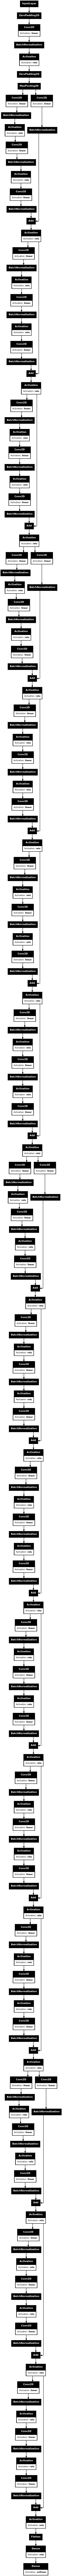

In [15]:
plot_model(model, show_layer_activations=True)

In [16]:
from keras.datasets import cifar10

In [17]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [18]:
x_train.shape

(50000, 32, 32, 3)

In [19]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
             metrics=['accuracy'])

In [21]:
model.fit(x_train, y_train, epochs=3, batch_size=10)

Epoch 1/3
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 317s 63ms/step - accuracy: 0.5819 - loss: 1.1918
Epoch 2/3
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 381s 76ms/step - accuracy: 0.6326 - loss: 1.0537
Epoch 3/3
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 334s 67ms/step - accuracy: 0.6556 - loss: 0.9859
